**Purpose: Design RNA folding routine function**

Questions:  
**1. Will the AND-1 riboswitch cleave itself when both of its OBS are bound?**    
Yes. It receives two TRUE signals and then translate into a TRUE output.  
**2. Will the OR-1 riboswitch cleave itself when neither of its OBS are bound?**  
No. It was cleave itself when there is at least one bound.  
**3. What behavior do we expect from the YES-1 riboswitch?**   
A TURE input will be when the OBS is bound and vice versa.   



In [2]:
import subprocess
from Bio import SeqIO
from Bio import Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

In [6]:
yes1_seq = Seq("AGUGGCAAAGCGGACUACUUGGACCUGUCACUGCUGAUUUGAGUUCGAGUAGUCCCAGCGGGCCCGUUGGAUGCCGAA")
not1_seq = Seq("CGUCACCUUAUGUCCUGCGUUUUGUGACGUGCCAAAUCACCACACACAGCGCAAAGCAGGUAGAAACCCUGAGUAGUCGACAUACAUGGACGG")
and1_seq = Seq("UAACAGAGACCCGUUGGAUGCCGAAAGUGGCAAAGCGGACUAGCUUGAACGUAUCCCUAUUGUGGAGUACAUACCUCGACAUUUAUGAUUUGGUUCGAGUAGUCCCAGCGGG")
or1_seq = Seq("CCCGUUGGAUGCCGAAAGUGGCAAAGCGGACUAGCUUGAACGCAUCCCUCUUGUGGAGUACAUACCUCGACAUUUAUGAGUUGGUUCGAGUAGUCCCAGCGGG")

For each riboswitch, produce a table in your iPython notebook that contains the
following information: (1) riboswitch name, (2) start and end coordinates of OBS-1
(blue region), (3) start 
and end coordinates of OBS-2 (blue region, only applicable to AND-1 and OR-1), and
(4) start and end coordinates of the two red regions. 

In [ ]:
# Create a table and input the data

In [20]:
riboswitch = pd.DataFrame([['YES-1', yes1_seq, 26, 47, "NA", "NA", 16, 21, 49, 55],
                             ['NOT-1', not1_seq, 44, 66, "NA", "NA", 40, 43, 74, 77],
                             ['AND-1', and1_seq, 30, 45, 49, 64, 16, 23, 70, 77],
                             ['OR-1',  or1_seq,  27, 46, 47, 66, 16, 26, 67, 77]
                            ], columns = ['Type', 'Sequence', 'OBS-1 start', 'OBS-1 end',
                                         'OBS-2 start', 'OBS-2 end', 'Red-1 start', 'Red-1 end',
                                         'Red-2 start', 'Red-2 end'],
                           )
riboswitch.set_index('Type', inplace = True)
display(riboswitch)

,Sequence,OBS-1 start,OBS-1 end,OBS-2 start,OBS-2 end,Red-1 start,Red-1 end,Red-2 start,Red-2 end
Type,,,,,,,,,
YES-1,"(A, G, U, G, G, C, A, A, A, G, C, G, G, A, C, ...",26,47,NA,NA,16,21,49,55
NOT-1,"(C, G, U, C, A, C, C, U, U, A, U, G, U, C, C, ...",44,66,NA,NA,40,43,74,77
AND-1,"(U, A, A, C, A, G, A, G, A, C, C, C, G, U, U, ...",30,45,49,64,16,23,70,77
OR-1,"(C, C, C, G, U, U, G, G, A, U, G, C, C, G, A, ...",27,46,47,66,16,26,67,77


In [16]:
import RNA
# The RNA sequence
yes1seq = "AGUGGCAAAGCGGACUACUUGGACCUGUCACUGCUGAUUUGAGUUCGAGUAGUCCCAGCGGGCCCGUUGGAUGCCGAA"
# compute minimum free energy (MFE) and corresponding structure
yes1_seq_fold = RNA.fold(yes1seq)
# print output
print(yes1_seq_fold)
#using python function to fold RNA

['..(((((....((((((((((((((.((((....))))..).)))))))))))))(((((....)))))..)))))..', -31.399999618530273]


**Running RNAfold within Python :**

In [34]:
import subprocess


yes1str = 'AGUGGCAAAGCGGACUACUUGGACCUGUCACUGCUGAUUUGAGUUCGAGUAGUCCCAGCGGGCCCGUUGGAUGCCGAA'
not1str = 'CGUCACCUUAUGUCCUGCGUUUUGUGACGUGCCAAAUCACCACACACAGCGCAAAGCAGGUAGAAACCCUGAGUAGUCGACAUACAUGGACGG'
and1str = 'UAACAGAGACCCGUUGGAUGCCGAAAGUGGCAAAGCGGACUAGCUUGAACGUAUCCCUAUUGUGGAGUACAUACCUCGACAUUUAUGAUUUGGUUCGAGUAGUCCCAGCGGG'
or1str = 'CCCGUUGGAUGCCGAAAGUGGCAAAGCGGACUAGCUUGAACGCAUCCCUCUUGUGGAGUACAUACCUCGACAUUUAUGAGUUGGUUCGAGUAGUCCCAGCGGG'

str_seqs = [yes1str, not1str, and1str, or1str]
names = ['YES-1', 'NOT-1', 'AND-1', 'OR-1']
for i in range(len(switch_seqs)):
    folded_seq = subprocess.run('RNAfold', input=bytes(str_seqs[i], 'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    print(' RNAfold ' + names[i] + ' riboswitch:')
    print(folded_seq.stderr.decode())
    print(folded_seq.stdout.decode())

 RNAfold YES-1 riboswitch:

AGUGGCAAAGCGGACUACUUGGACCUGUCACUGCUGAUUUGAGUUCGAGUAGUCCCAGCGGGCCCGUUGGAUGCCGAA
..(((((....((((((((((((((.((((....))))..).)))))))))))))(((((....)))))..))))).. (-31.40)

 RNAfold NOT-1 riboswitch:

CGUCACCUUAUGUCCUGCGUUUUGUGACGUGCCAAAUCACCACACACAGCGCAAAGCAGGUAGAAACCCUGAGUAGUCGACAUACAUGGACGG
((((....((((((.((((((.((((..(((......)))..)))).))))))...((((.......)))).......))))))....)))). (-26.70)

 RNAfold AND-1 riboswitch:

UAACAGAGACCCGUUGGAUGCCGAAAGUGGCAAAGCGGACUAGCUUGAACGUAUCCCUAUUGUGGAGUACAUACCUCGACAUUUAUGAUUUGGUUCGAGUAGUCCCAGCGGG
.........(((((((..((((......))))....((((((.(((((((..(((.....(((.(((.......))).))).....)))...)))))))))))))))))))) (-39.70)

 RNAfold OR-1 riboswitch:

CCCGUUGGAUGCCGAAAGUGGCAAAGCGGACUAGCUUGAACGCAUCCCUCUUGUGGAGUACAUACCUCGACAUUUAUGAGUUGGUUCGAGUAGUCCCAGCGGG
(((((((..((((......))))....((((((.(((((((...((.....(((.(((.......))).))).....))....)))))))))))))))))))) (-39.00)



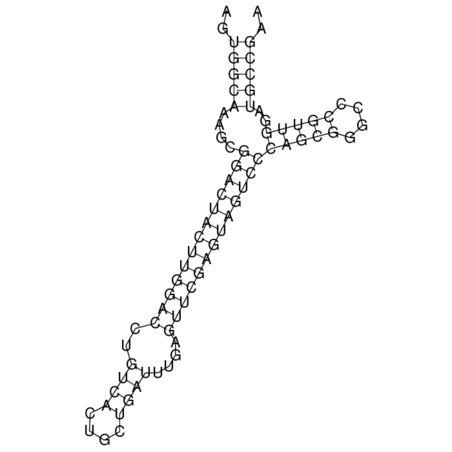

In [44]:
from IPython.display import Image
from IPython.core.display import HTML 

Image("yes1.png", width=300, height=300) 

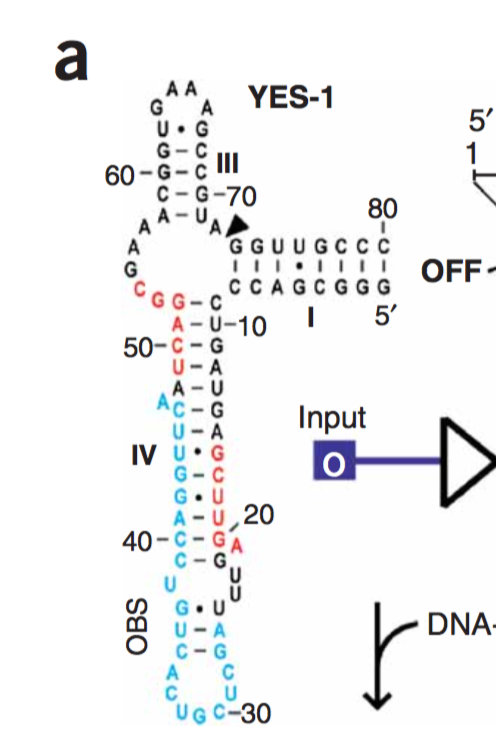

In [46]:
Image("yes1paper.png", width=300, height=300) 
    

From the above two images, one is formed by **The RNAfold web server** (http://rna.tbi.univie.ac.at//cgi-bin/RNAWebSuite/RNAfold.cgi) and the other is from the paper. We can see that their structures are very close to each others. 

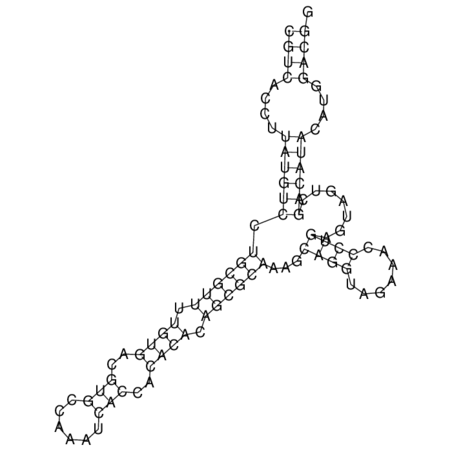

In [47]:
Image("not1.png", width=300, height=300) 

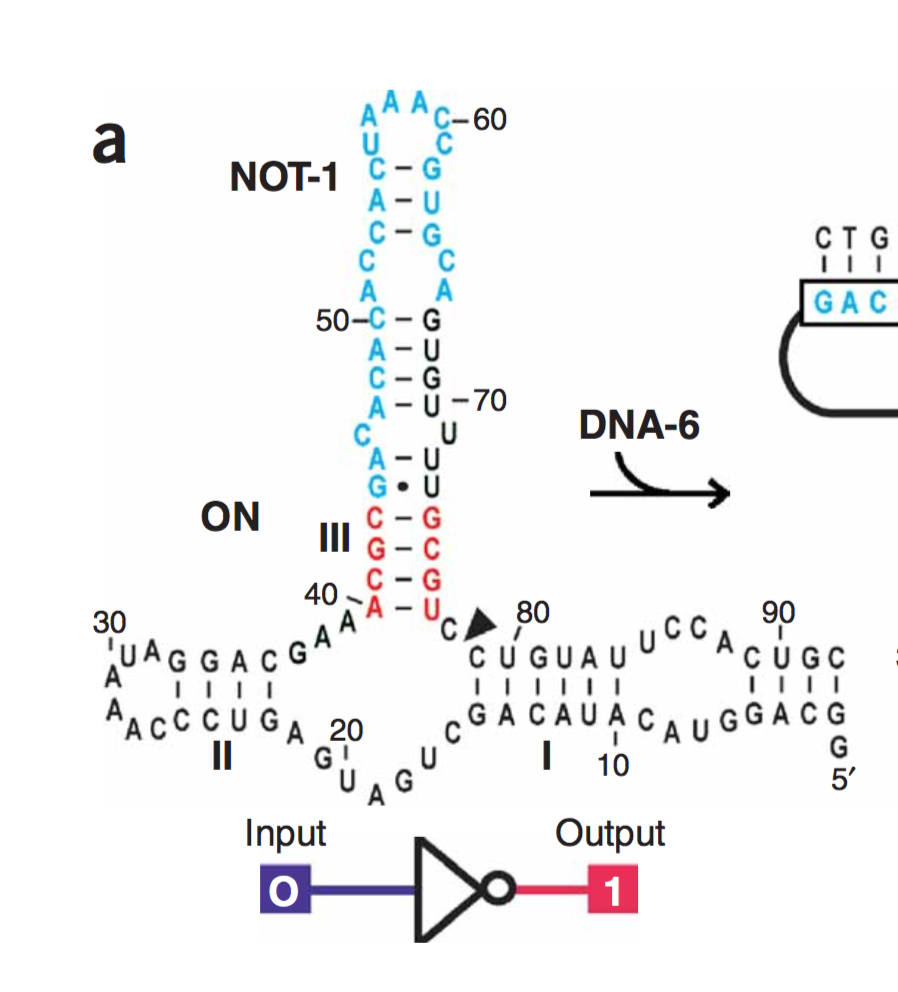

In [48]:
Image("not1paper.png", width=300, height=300) 

Rearranging the orientation, we found that the two structures are very close.

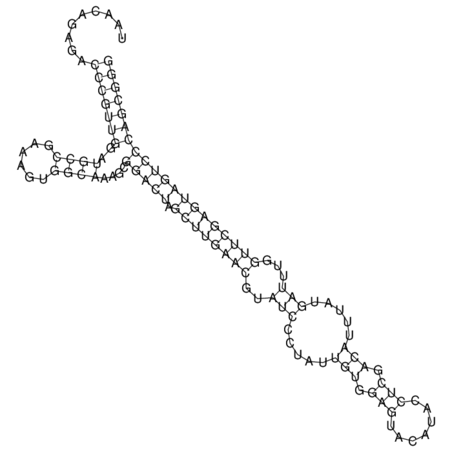

In [50]:
Image("and1.png", width=300, height=300) 

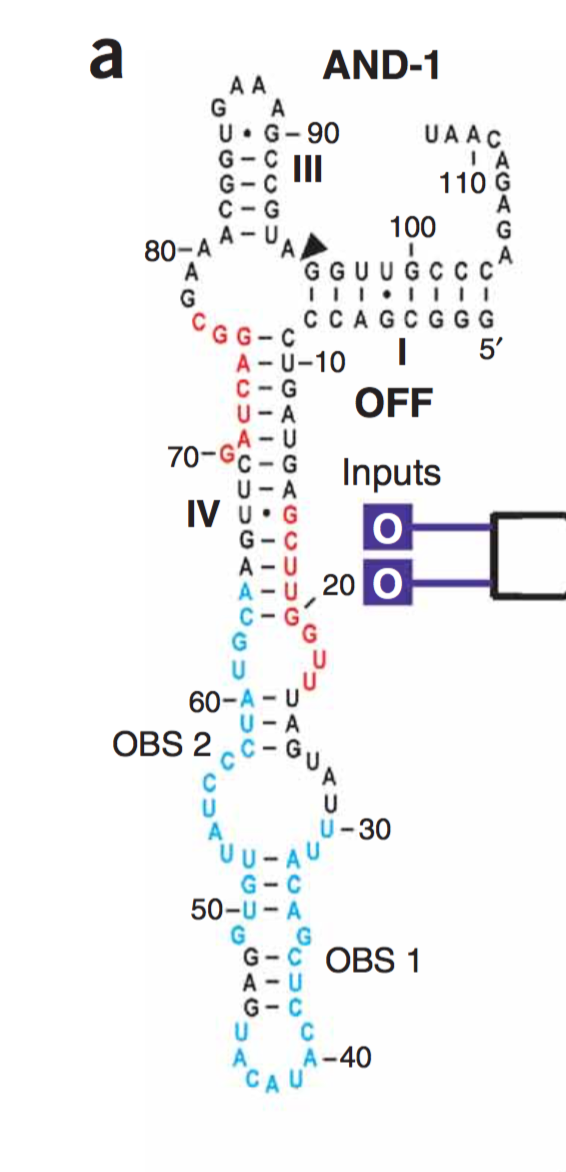

In [51]:
Image("and1paper.png", width=300, height=300) 

Again, also very similar in structures. 

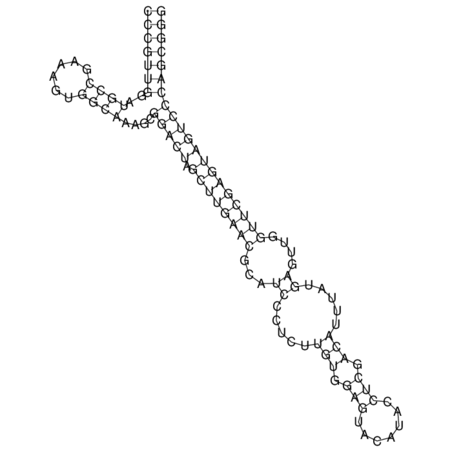

In [52]:
Image("or1.png", width=300, height=300) 

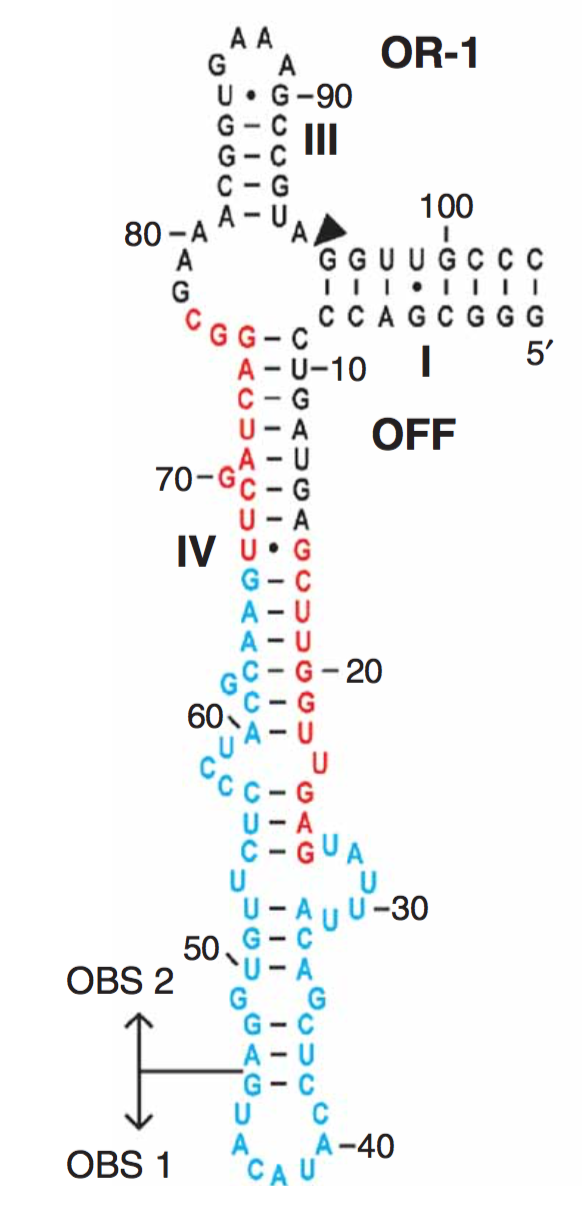

In [71]:
Image("or1paper.png", width=200, height=200) 

Like the three above riboswiches, these OR-1 Gates structures share the exact same base-pairing.

### Simulating OBS binding in YES-1 and NOT-1

In [89]:
x = ['YES-1_constraints.txt', 'NOT-1_constraints.txt']

for i in x:
    p = subprocess.run(['RNAfold', '-C', i],
            stdout = subprocess.PIPE,
            stderr = subprocess.PIPE)
    print(p.stdout.decode())
    print(p.stderr.decode())

>YES-1_constraint
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)


>NOT-1_constraints
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....)))) (-20.80)




RNAfold output for Yes-1 with constraints for OBS1:  
The YES-1 constraint seems to be the same self-cleaving structure as shown in the paper.

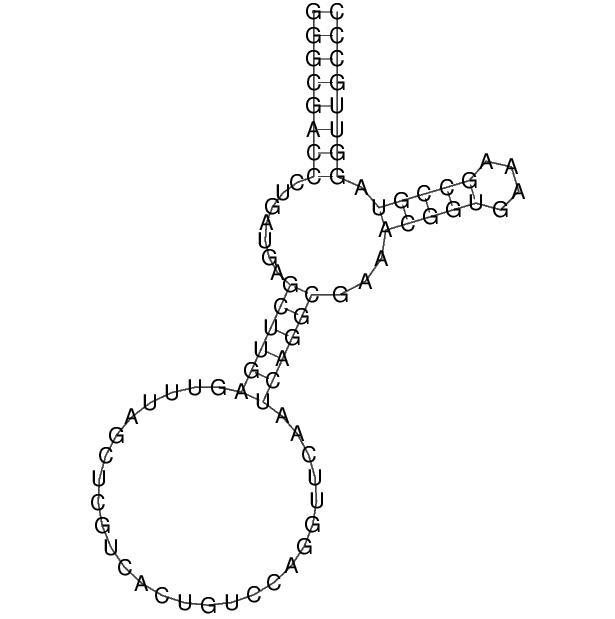

In [91]:
Image('yes1constraint.png', width=200, height=200)

RNAfold output for Not-1 with constraints for OBS1

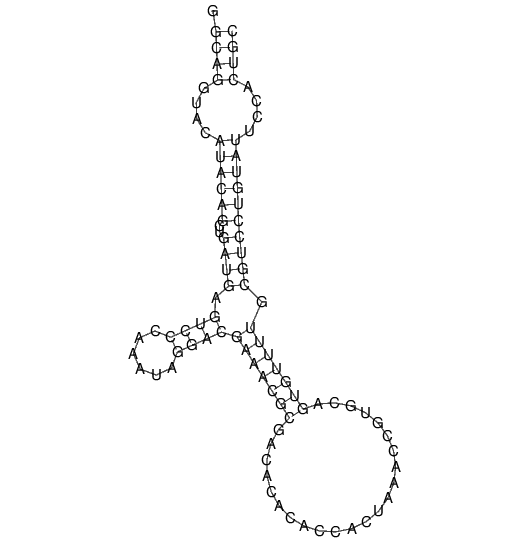

In [94]:
Image('not1constraint.png', width=300, height=200)

The Not-1 constraint seems to be different from the self-cleaving structure shown in the paper.

### Simulating OBS binding in AND-1 and OR-1

In [98]:
x = ['AND1-OBS1-Constrained.txt', 'AND1-OBS2-Constrained.txt', 'AND1-OBSboth.txt','OR1-OBS1-Constrained.txt','OR1-OBS2-Constrained.txt','OR1-OBSboth.txt',]

for i in x:
    p = subprocess.run(['RNAfold', '-C', i],
            stdout = subprocess.PIPE,
            stderr = subprocess.PIPE)
    print(p.stdout.decode())
    print(p.stderr.decode())

>AND-1-OBS1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)


>AND-1-OBS2
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).))))))))......... (-29.60)


>AND-1-OBS1_2
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((..............................................))))).))))).....(((((....))))).))))))))......... (-27.64)


>OR-1-OBS1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-34.20)


>OR-1-OBS2
GGGCGACCCU

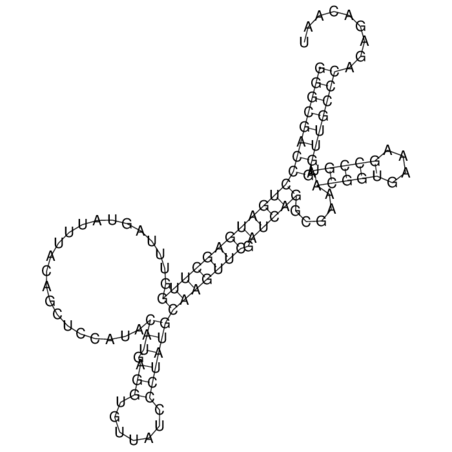

In [99]:
Image('And1_Obs1_C.png', width=300, height=200)
#AND1-OBS1-Constrained

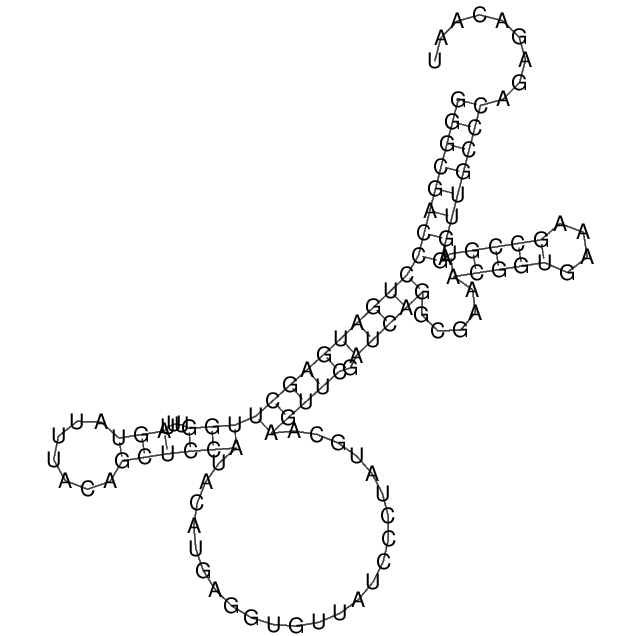

In [100]:
Image('And1_Obs2_C.png', width=300, height=200)
#AND1-OBS2-Constrained

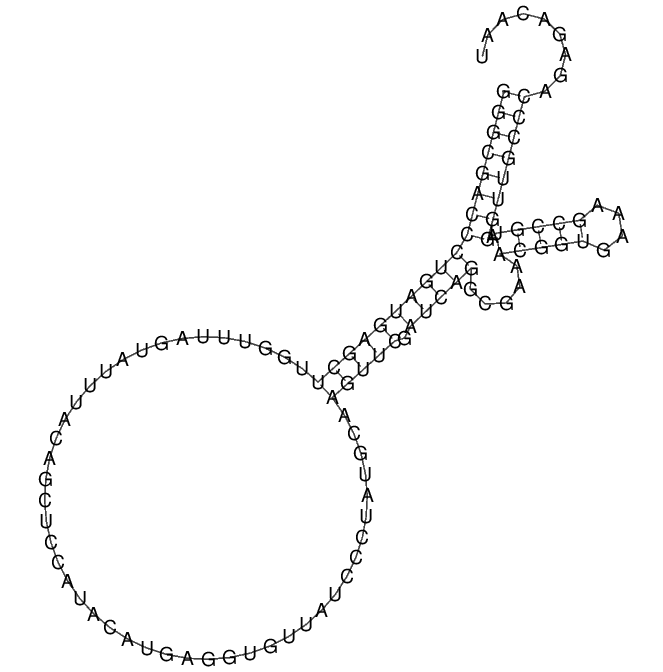

In [101]:
#AND1-OBS1&2-Constrained
Image('AND1-OBS1&2-Constrained.png', width=300, height=200)

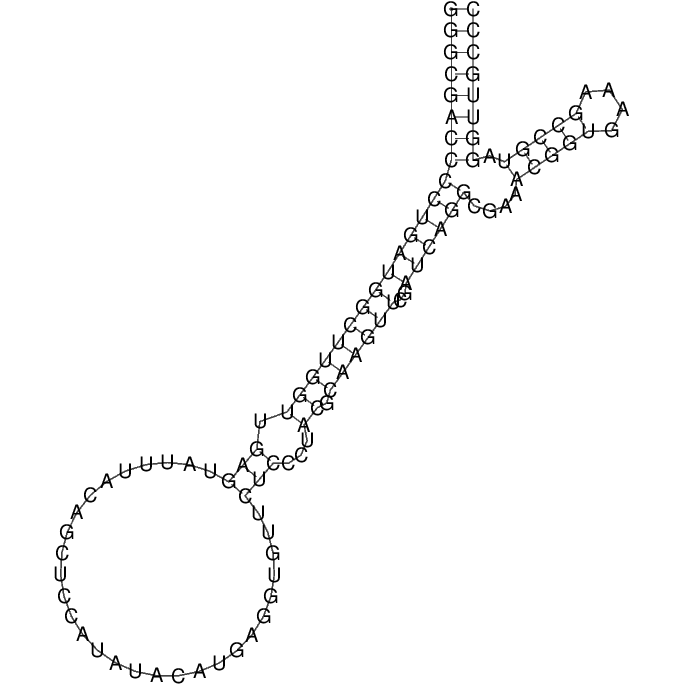

In [102]:
Image('Or1_Obs1_C.png', width=300, height=200)
#OR1-OBS1-Constrained


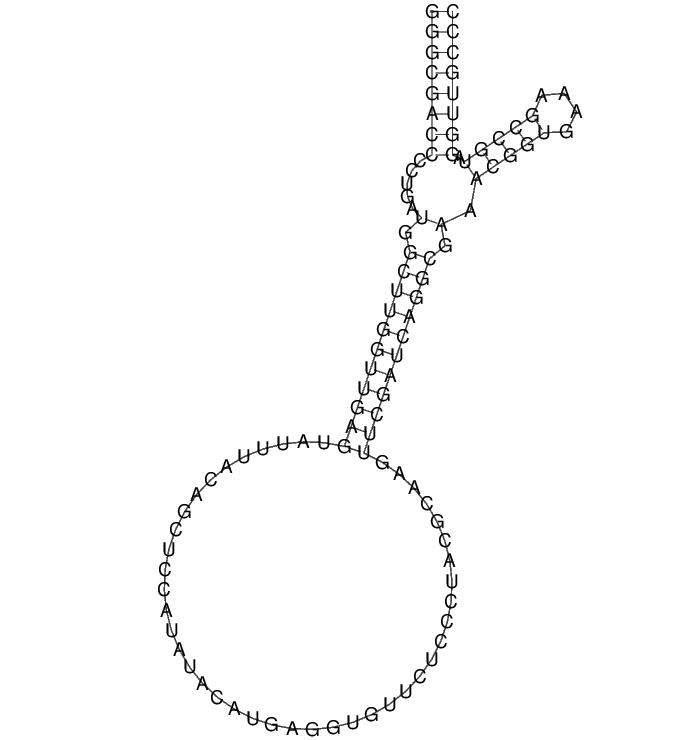

In [103]:
Image('Or1_Obs2_C.png', width=300, height=200)
#OR1-OBS2-Constrained

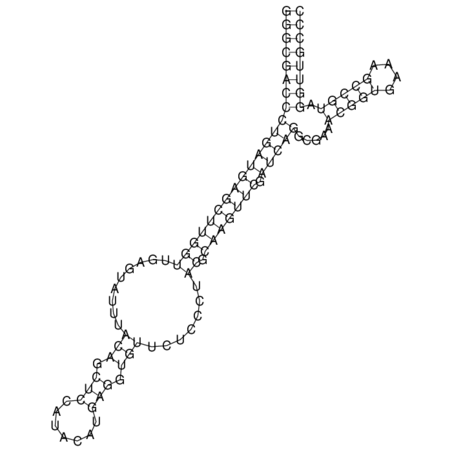

In [104]:
Image('Or1-OBS1&2-Constrained.png', width=300, height=200)
#OR1-OBS1&2-Constrained


In [111]:
turthAND = pd.DataFrame([['T', 'T', 'F'],['T','F','F'],
                             ['F', 'T', 'F'],
                             ['F','F','F']
                            ], columns = ['OBS1', 'OBS2', ' Both OBS1 and OBS2'],
                           )

display(turthAND)



,OBS1,OBS2,Both OBS1 and OBS2
0,T,T,F
1,T,F,F
2,F,T,F
3,F,F,F


According to our result, the AND gate from the paper is not accurate. It should be True, True, True in the first row. 

In [110]:
turthOR= pd.DataFrame([['T', 'T', 'F'],['T','F','T'],
                             ['F', 'T', 'T'],
                             ['F','F','F']
                            ], columns = ['OBS1', 'OBS2', ' Both OBS1 and OBS2'],
                           )

display(turthAND)

,OBS1,OBS2,Both OBS1 and OBS2
0,T,T,T
1,T,F,F
2,F,T,F
3,F,F,F


Also the OR gate is not accurate regarding to two True inputs produce the True output. For a real OR gate, only one True input will result in a True output.

**According to your results, do the AND-1 and OR-1 riboswitches work as the paper claims?**  
No, as explained above. 